In [1]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.28/04


In [2]:
ERA = "2017"
MEASURE = "electron"
isQCD = True

In [3]:
ptCorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptCorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptCorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.579, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [12]:
if not isQCD:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate.root" 
else:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate_qcd_EMEnriched.root"
print(file_path)
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
h = f.Get("fakerate")

for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta+1e-5, ptCorr+1e-5)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

../results/2017/ROOT/electron/fakerate_qcd_EMEnriched.root
0.0 10.0 0.6439546774834306 0.101192145964236 15.714172053178343
0.0 15.0 0.3553287176556019 0.0628388703778342 17.684714816307086
0.0 20.0 0.239526527228466 0.0327341505258997 13.666190089533217
0.0 25.0 0.1485426363866224 0.0170150154816112 11.454634100693498
0.0 35.0 0.1262981132333424 0.0150896091700645 11.94761250485639
0.0 50.0 0.143648222629033 0.0141736331810311 9.86690466587537
0.8 10.0 0.5974777916878309 0.0890869993549498 14.910512255741853
0.8 15.0 0.3067735645908274 0.0506737407288498 16.518287941934666
0.8 20.0 0.2115693971254534 0.0267632622841803 12.649874059200823
0.8 25.0 0.1657192789939651 0.0176611012506647 10.657239977074637
0.8 35.0 0.1787252576339453 0.017960395188194 10.04916452546368
0.8 50.0 0.1708757585817168 0.0135564464578872 7.933510622224503
1.579 10.0 0.5889683110307518 0.062367868581441 10.589341975341792
1.579 15.0 0.432484007667029 0.0375098999485601 8.673129938584713
1.579 20.0 0.325941704650

In [13]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

In [14]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [15]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    #if isQCD:
    #    hist.GetXaxis().SetRangeUser(10., 100.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)


legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

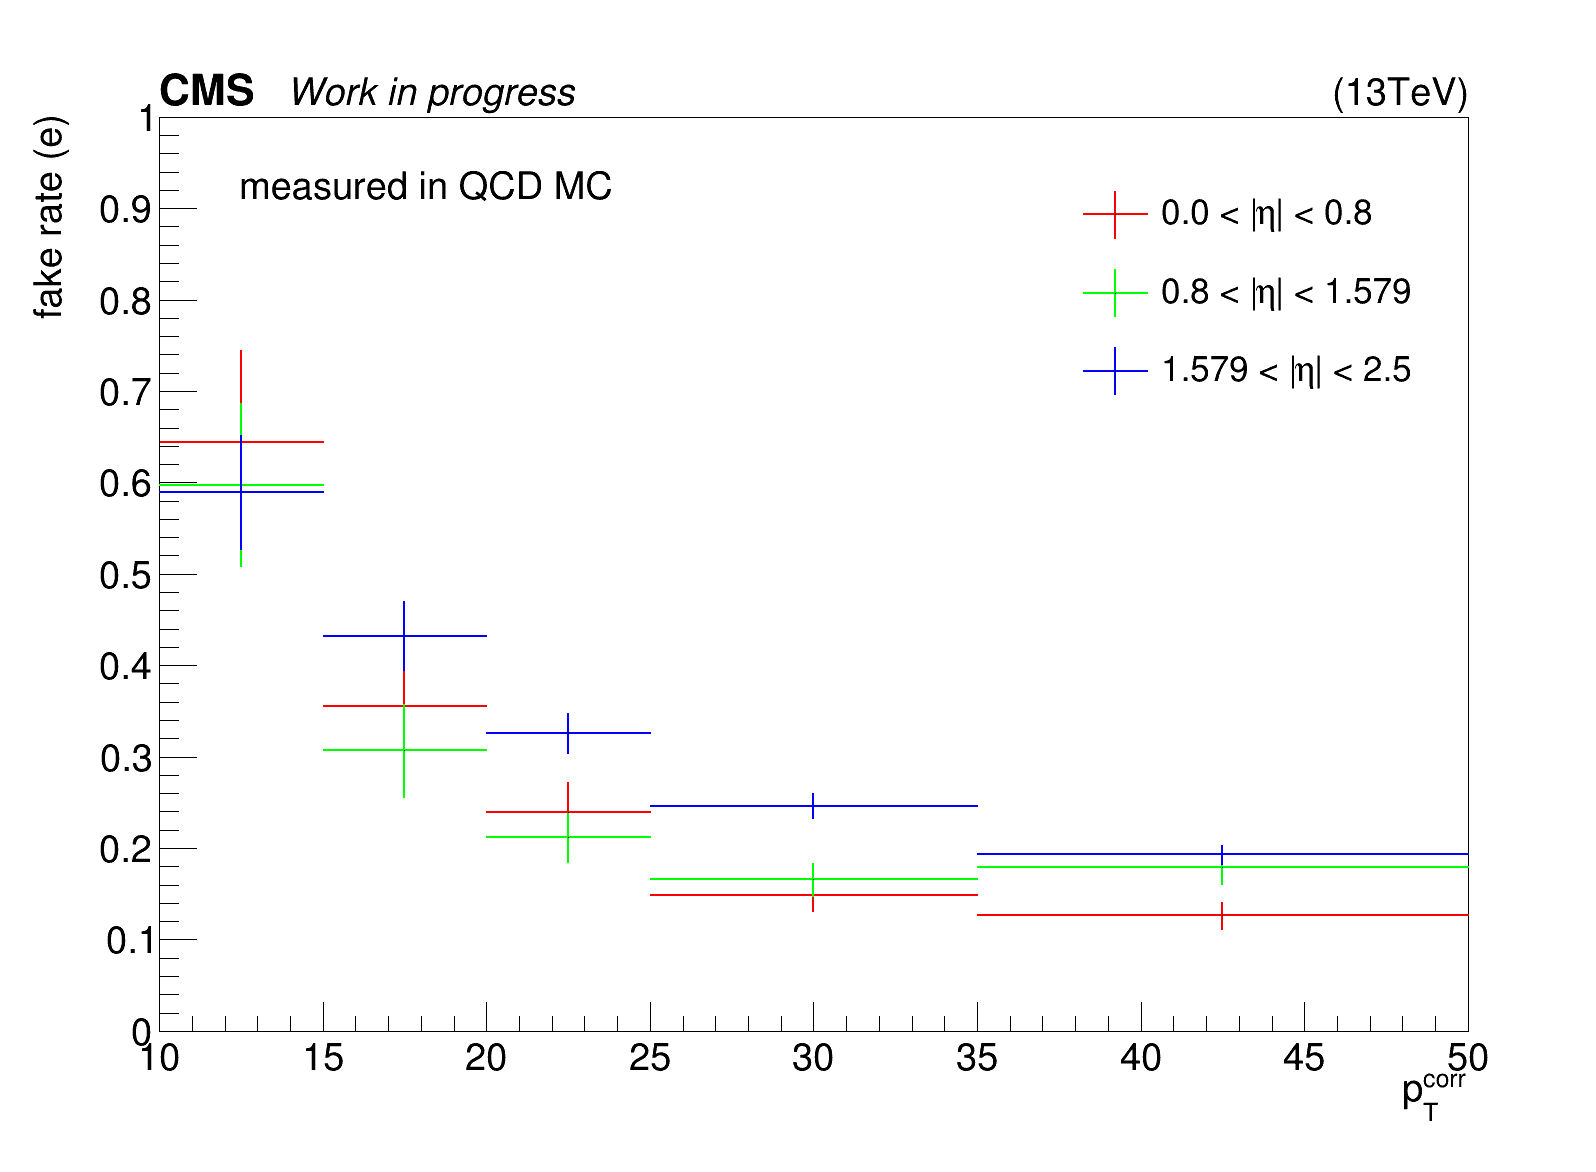

In [16]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.83, "measured in QCD MC")


canvas.Draw()